[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/porkr/nltk_data...
[nltk_data] Downloading package punkt to /Users/porkr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Loaded 1551 posts
Columns: ['title', 'url', 'body_preview', 'author', 'author_rank', 'timestamp', 'timestamp_relative', 'category', 'views', 'likes', 'comments']

Data types:
title                 object
url                   object
body_preview          object
author                object
author_rank           object
timestamp             object
timestamp_relative    object
category              object
views                  int64
likes                  int64
comments               int64
dtype: object
SENTIMENT ANALYSIS RESULTS

Total Posts Analyzed: 1551

Sentiment Distribution:
sentiment_label
Positive    872
Negative    456
Neutral     223
Name: count, dtype: int64

Percentage Distribution:
sentiment_label
Positive    56.22
Negative    29.40
Neutral     14.38
Name: proportion, dtype: float64


VADER Compound Score Statistics:
count    1551.000000
mean        0.193322
std         0.576752
min        -0.993800
25%        -0.258400
50%         0.238200
75%         0.735000
max        

/var/folders/lx/l11c9kbn61z0qfl7dpbykpjh0000gn/T/ipykernel_9954/433455766.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'],


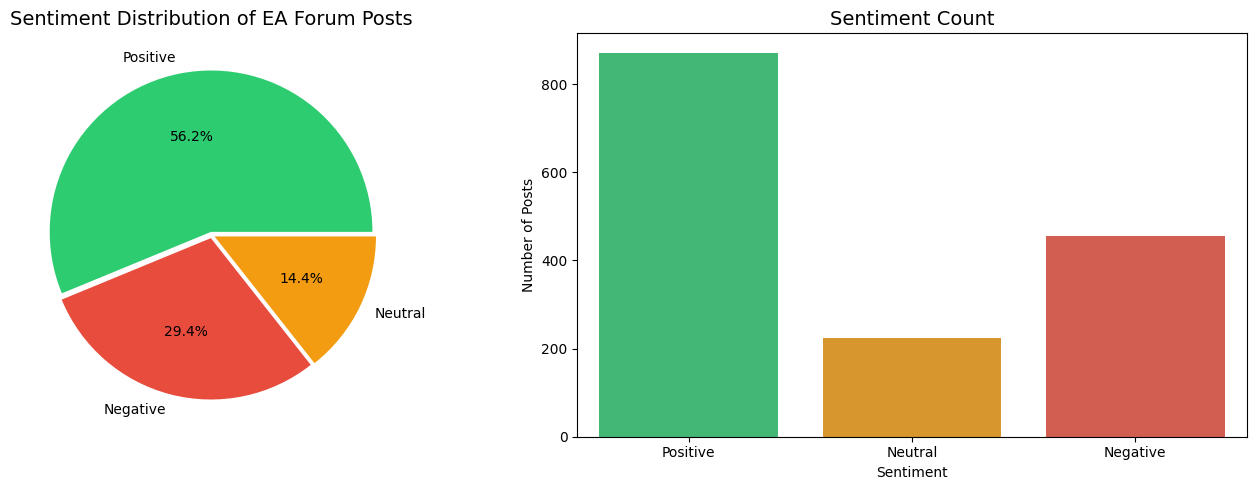

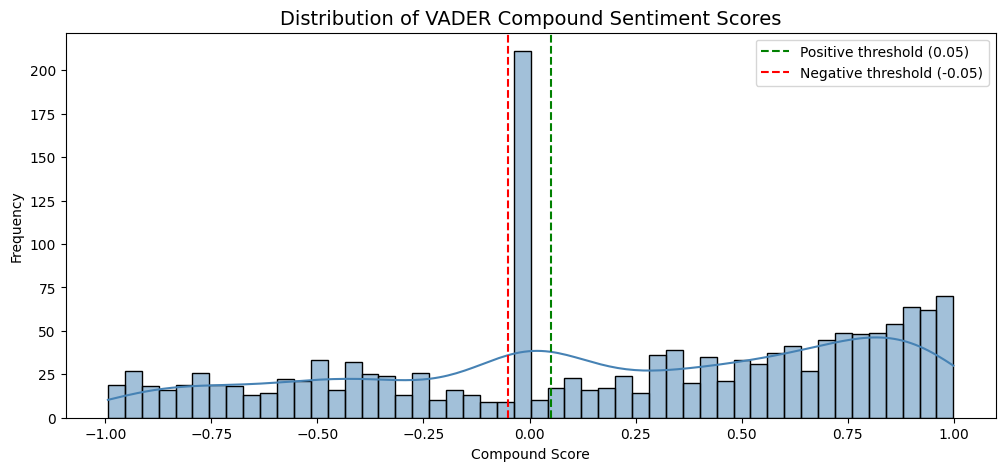

<Figure size 1400x600 with 0 Axes>

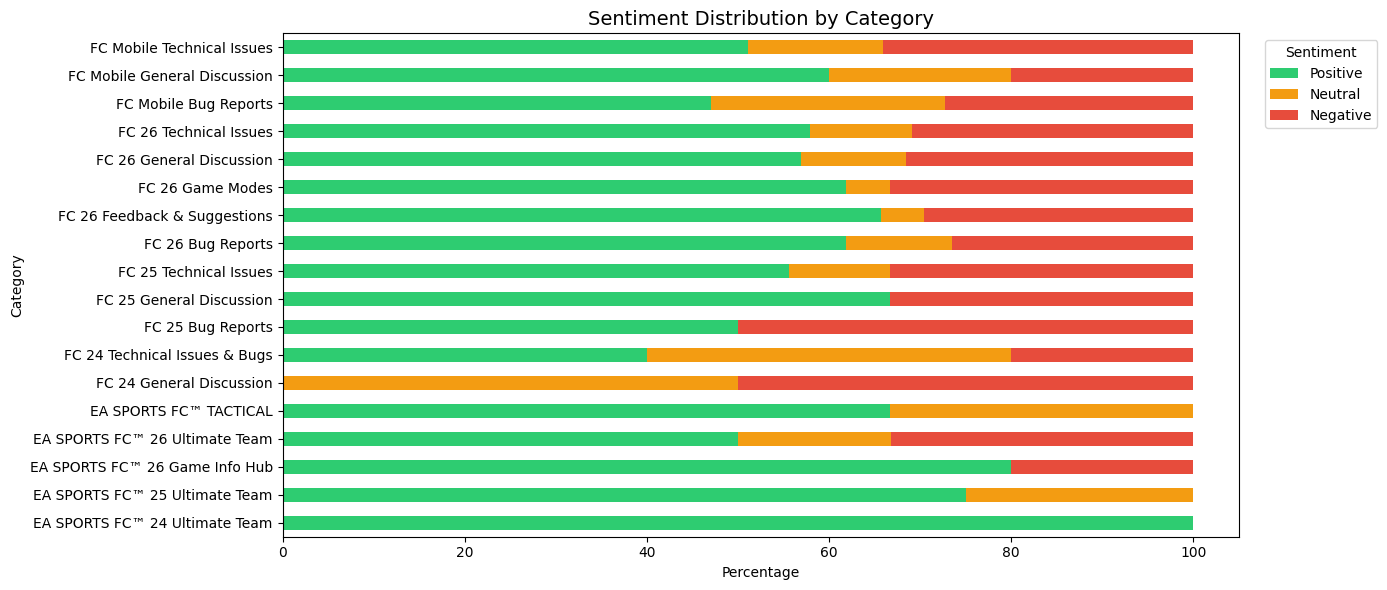

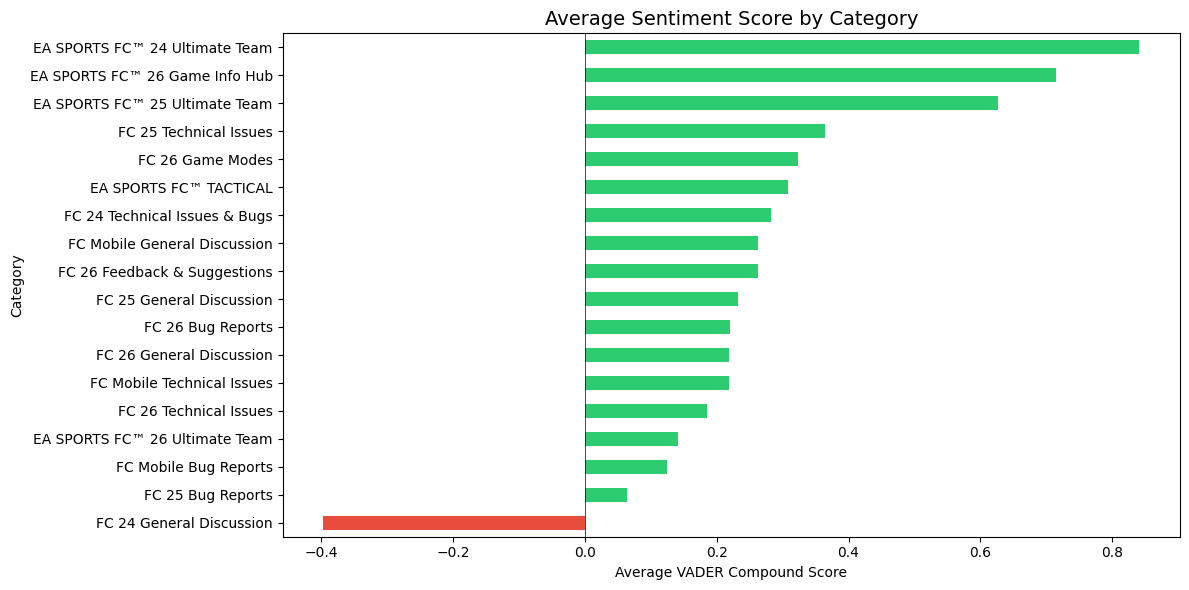

TOP 10 MOST NEGATIVE POSTS


,title,category,vader_compound,likes,comments
96,Classic Squads made Team Management even worse,FC 26 Bug Reports,-0.9938,0,0
614,the most beautiful game in the world,FC 26 Bug Reports,-0.9912,0,0
1039,FC 26 Is Hands Down the Worst Gameplay Experie...,FC 26 General Discussion,-0.9883,1,2
861,EA Konto Server nicht erreichbar,FC 26 Bug Reports,-0.9879,0,0
1297,EA SPORTS FC 26 – Random Crashes (Access Viola...,FC 26 Bug Reports,-0.9857,16,11
301,I have got 2 bans on transfer market in terms ...,FC 26 General Discussion,-0.9841,1,3
453,serious problems on nintendo,FC 26 Bug Reports,-0.9824,1,1
137,ea unfair ban and compensation ?,EA SPORTS FC™ 26 Ultimate Team,-0.9782,0,2
109,I just want to be able to play the game,FC 26 Technical Issues,-0.9762,6,4
143,Match-Making Bug,FC Mobile General Discussion,-0.9723,0,4


TOP 10 MOST POSITIVE POSTS


,title,category,vader_compound,likes,comments
61,PRO Clubs: Broken Progression System & Solutions,FC 26 Feedback & Suggestions,0.9991,2,1
1078,there just taking your money with no remorse.,FC 26 General Discussion,0.9986,0,0
1207,Manager Career Mode Needs Meaningful Evolution,FC 26 Game Modes,0.9961,0,0
352,Boot styles on Icons and Heroes don’t reflect ...,FC 26 Feedback & Suggestions,0.9956,2,6
970,FC 27,FC 26 Game Modes,0.9956,0,0
299,⚽ FC Mobile Feature Request Form,FC Mobile Bug Reports,0.9949,0,4
1323,Career Mode - Clubs gltichs fix plz,FC 26 Technical Issues,0.9941,0,0
1469,Bring Back the Champions Channel & Global Lead...,FC 26 Feedback & Suggestions,0.9940,0,1
908,lighting seems darker in friendlys/Champions c...,FC 26 Feedback & Suggestions,0.9939,0,2
654,Verses Attack,FC Mobile Bug Reports,0.9938,0,0


CORRELATION: SENTIMENT VS ENGAGEMENT
                vader_compound     views     likes  comments
vader_compound        1.000000  0.056871  0.055812  0.040652
views                 0.056871  1.000000  0.775826  0.725920
likes                 0.055812  0.775826  1.000000  0.728632
comments              0.040652  0.725920  0.728632  1.000000


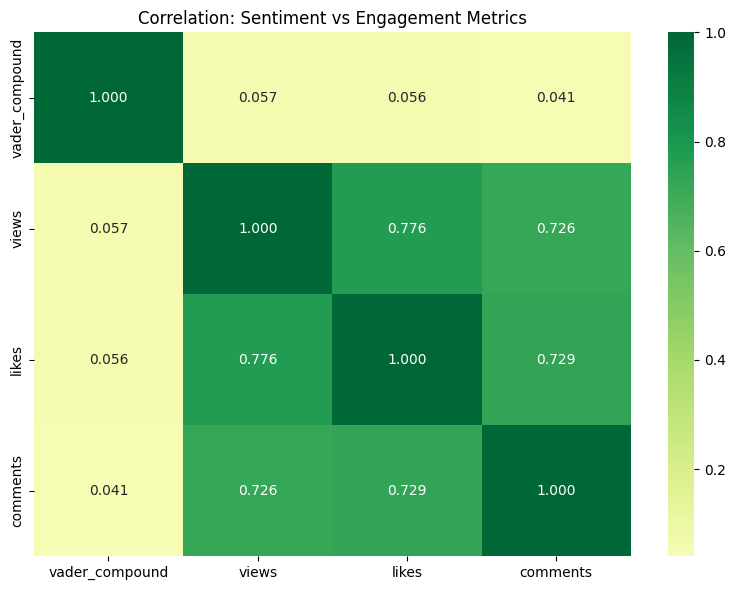

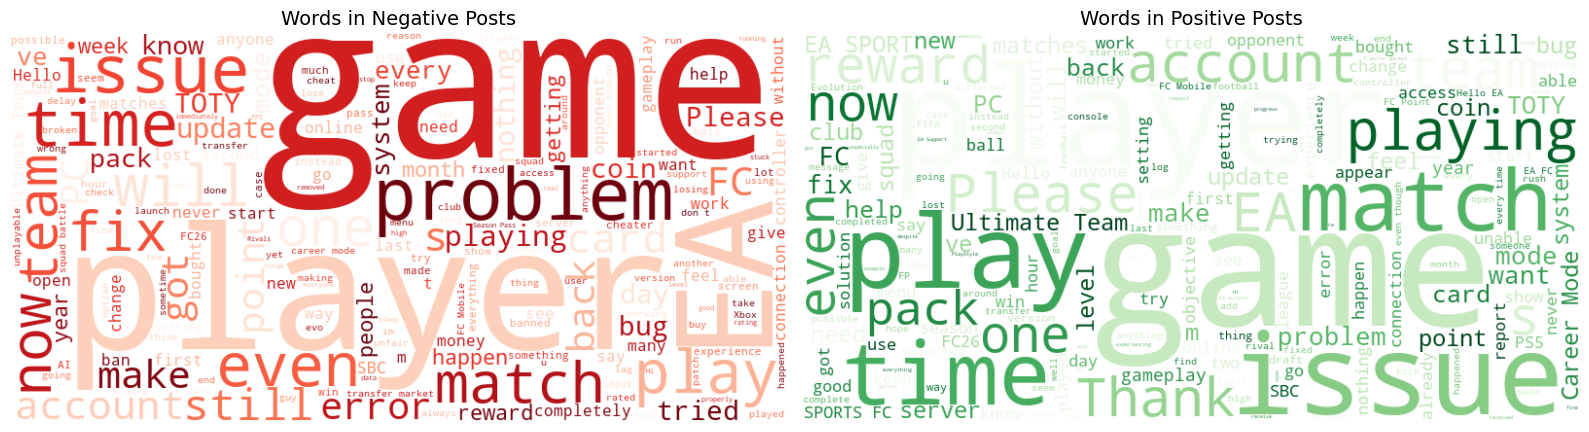

Results exported to 'ea_forum_posts_sentiment.csv'

SUMMARY

Total Posts: 1551
Average Sentiment Score: 0.193
Median Sentiment Score: 0.238

Sentiment Breakdown:
  - Positive: 872 (56.2%)
  - Neutral:  223 (14.4%)
  - Negative: 456 (29.4%)



In [1]:

# %% [markdown]
# # Sentiment Analysis of EA Forum Posts

# %% 
# Install required packages (run once)
# !pip install pandas nltk textblob matplotlib seaborn wordcloud

# %%
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (run once)
nltk.download('vader_lexicon')
nltk.download('punkt')

# %%
# Load the data
df = pd.read_csv('ea_forum_posts.csv')
print(f"Loaded {len(df)} posts")
df.head()

# %%
# Preview the data
print("Columns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

# %%
# Initialize VADER sentiment analyzer (better for social media/forum text)
sia = SentimentIntensityAnalyzer()

# Function to get VADER sentiment scores
def get_vader_sentiment(text):
    if pd.isna(text) or text == '':
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return sia.polarity_scores(str(text))

# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    if pd.isna(text) or text == '':
        return 0
    return TextBlob(str(text)).sentiment.polarity

# %%
# Apply VADER sentiment analysis to body_preview
vader_scores = df['body_preview'].apply(get_vader_sentiment)
df['vader_negative'] = vader_scores.apply(lambda x: x['neg'])
df['vader_neutral'] = vader_scores.apply(lambda x: x['neu'])
df['vader_positive'] = vader_scores.apply(lambda x: x['pos'])
df['vader_compound'] = vader_scores.apply(lambda x: x['compound'])

# Apply TextBlob sentiment analysis
df['textblob_polarity'] = df['body_preview'].apply(get_textblob_sentiment)

# %%
# Classify sentiment based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['vader_compound'].apply(classify_sentiment)

# %%
# Display sentiment statistics
print("=" * 50)
print("SENTIMENT ANALYSIS RESULTS")
print("=" * 50)
print(f"\nTotal Posts Analyzed: {len(df)}")
print(f"\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())
print(f"\nPercentage Distribution:")
print(df['sentiment_label'].value_counts(normalize=True).mul(100).round(2))

print(f"\n\nVADER Compound Score Statistics:")
print(df['vader_compound'].describe())

# %%
# Visualization 1: Sentiment Distribution Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors = {'Positive': '#2ecc71', 'Neutral': '#f39c12', 'Negative': '#e74c3c'}
sentiment_counts = df['sentiment_label'].value_counts()
axes[0].pie(sentiment_counts.values, 
            labels=sentiment_counts.index, 
            autopct='%1.1f%%',
            colors=[colors[label] for label in sentiment_counts.index],
            explode=[0.02] * len(sentiment_counts))
axes[0].set_title('Sentiment Distribution of EA Forum Posts', fontsize=14)

# Bar chart
sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'],
              palette=colors, ax=axes[1])
axes[1].set_title('Sentiment Count', fontsize=14)
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Number of Posts')

plt.tight_layout()
plt.show()

# %%
# Visualization 2: Compound Score Distribution
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(df['vader_compound'], bins=50, kde=True, color='steelblue', ax=ax)
ax.axvline(x=0.05, color='green', linestyle='--', label='Positive threshold (0.05)')
ax.axvline(x=-0.05, color='red', linestyle='--', label='Negative threshold (-0.05)')
ax.set_title('Distribution of VADER Compound Sentiment Scores', fontsize=14)
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

# %%
# Visualization 3: Sentiment by Category (if categories exist)
if 'category' in df.columns:
    plt.figure(figsize=(14, 6))
    sentiment_by_category = pd.crosstab(df['category'], df['sentiment_label'], normalize='index') * 100
    sentiment_by_category[['Positive', 'Neutral', 'Negative']].plot(
        kind='barh', 
        stacked=True, 
        color=['#2ecc71', '#f39c12', '#e74c3c'],
        figsize=(14, 6)
    )
    plt.title('Sentiment Distribution by Category', fontsize=14)
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()

# %%
# Visualization 4: Average Sentiment by Category
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    category_sentiment = df.groupby('category')['vader_compound'].mean().sort_values()
    colors = ['#e74c3c' if x < -0.05 else '#2ecc71' if x > 0.05 else '#f39c12' for x in category_sentiment]
    category_sentiment.plot(kind='barh', color=colors)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.title('Average Sentiment Score by Category', fontsize=14)
    plt.xlabel('Average VADER Compound Score')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

# %%
# Show most negative posts
print("=" * 50)
print("TOP 10 MOST NEGATIVE POSTS")
print("=" * 50)
most_negative = df.nsmallest(10, 'vader_compound')[['title', 'category', 'vader_compound', 'likes', 'comments']]
display(most_negative)

# %%
# Show most positive posts
print("=" * 50)
print("TOP 10 MOST POSITIVE POSTS")
print("=" * 50)
most_positive = df.nlargest(10, 'vader_compound')[['title', 'category', 'vader_compound', 'likes', 'comments']]
display(most_positive)

# %%
# Correlation analysis: Sentiment vs Engagement
print("=" * 50)
print("CORRELATION: SENTIMENT VS ENGAGEMENT")
print("=" * 50)
correlation_cols = ['vader_compound', 'views', 'likes', 'comments']
available_cols = [col for col in correlation_cols if col in df.columns]
correlation_matrix = df[available_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.3f')
plt.title('Correlation: Sentiment vs Engagement Metrics')
plt.tight_layout()
plt.show()

# %%
# Word Cloud for Negative Posts (optional - requires wordcloud package)
try:
    from wordcloud import WordCloud, STOPWORDS
    
    negative_text = ' '.join(df[df['sentiment_label'] == 'Negative']['body_preview'].dropna())
    positive_text = ' '.join(df[df['sentiment_label'] == 'Positive']['body_preview'].dropna())
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    if negative_text:
        wordcloud_neg = WordCloud(width=800, height=400, background_color='white', 
                                   stopwords=STOPWORDS, colormap='Reds').generate(negative_text)
        axes[0].imshow(wordcloud_neg, interpolation='bilinear')
        axes[0].set_title('Words in Negative Posts', fontsize=14)
        axes[0].axis('off')
    
    if positive_text:
        wordcloud_pos = WordCloud(width=800, height=400, background_color='white',
                                   stopwords=STOPWORDS, colormap='Greens').generate(positive_text)
        axes[1].imshow(wordcloud_pos, interpolation='bilinear')
        axes[1].set_title('Words in Positive Posts', fontsize=14)
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("WordCloud not installed. Run: pip install wordcloud")

# %%
# Export results to CSV
output_df = df[['title', 'author', 'category', 'body_preview', 'vader_compound', 
                'vader_positive', 'vader_negative', 'vader_neutral', 
                'sentiment_label', 'views', 'likes', 'comments']].copy()
output_df.to_csv('ea_forum_posts_sentiment.csv', index=False)
print("Results exported to 'ea_forum_posts_sentiment.csv'")

# %%
# Summary Statistics
print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)
print(f"""
Total Posts: {len(df)}
Average Sentiment Score: {df['vader_compound'].mean():.3f}
Median Sentiment Score: {df['vader_compound'].median():.3f}

Sentiment Breakdown:
  - Positive: {(df['sentiment_label'] == 'Positive').sum()} ({(df['sentiment_label'] == 'Positive').mean()*100:.1f}%)
  - Neutral:  {(df['sentiment_label'] == 'Neutral').sum()} ({(df['sentiment_label'] == 'Neutral').mean()*100:.1f}%)
  - Negative: {(df['sentiment_label'] == 'Negative').sum()} ({(df['sentiment_label'] == 'Negative').mean()*100:.1f}%)
""")
